In [1]:
#importing necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px


In [2]:
#importing the dataset 
df= pd.read_csv("C:/Users/Admin/Documents/Coca_cola_Cashflow_statement.csv")

In [3]:
df.head()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
0,31-03-2009,-599,3923,-975,1295
1,30-06-2009,-565,623,-297,-2344
2,30-09-2009,-396,3394,-195,-1617
3,31-12-2009,-2589,3706,-1629,2113
4,31-03-2010,-1368,3889,-5326,704


In [4]:
#Converting DT column to date time column 
df['DT']=pd.to_datetime(df['DT'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1521098373.py:1: UserWarning: Parsing '31-03-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DT']=pd.to_datetime(df['DT'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1521098373.py:1: UserWarning: Parsing '30-06-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DT']=pd.to_datetime(df['DT'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1521098373.py:1: UserWarning: Parsing '30-09-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DT']=pd.to_datetime(df['DT'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1521098373.py:1: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DT']=pd.to_datetime(df['DT'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1521098373.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   DT                                   54 non-null     datetime64[ns]
 1   Cash_Flow_from_Investing_Activities  54 non-null     int64         
 2   Cash Flow from Operating Activities  54 non-null     int64         
 3   Cash Flow from Financial Activities  54 non-null     int64         
 4   Net Cash Flow                        54 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.2 KB


In [6]:
#setting DT column as our index 
df=df.set_index('DT')

In [7]:
df.tail()

,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
DT,,,,
2021-06-30,2034,1326,-1043,-1337
2021-09-30,166,1916,-1409,-1825
2021-12-31,-4684,2608,-1026,1199
2022-03-31,146,2789,-1675,831
2022-06-30,-1291,873,1817,2115


array([<AxesSubplot:xlabel='DT'>, <AxesSubplot:xlabel='DT'>,
       <AxesSubplot:xlabel='DT'>, <AxesSubplot:xlabel='DT'>], dtype=object)

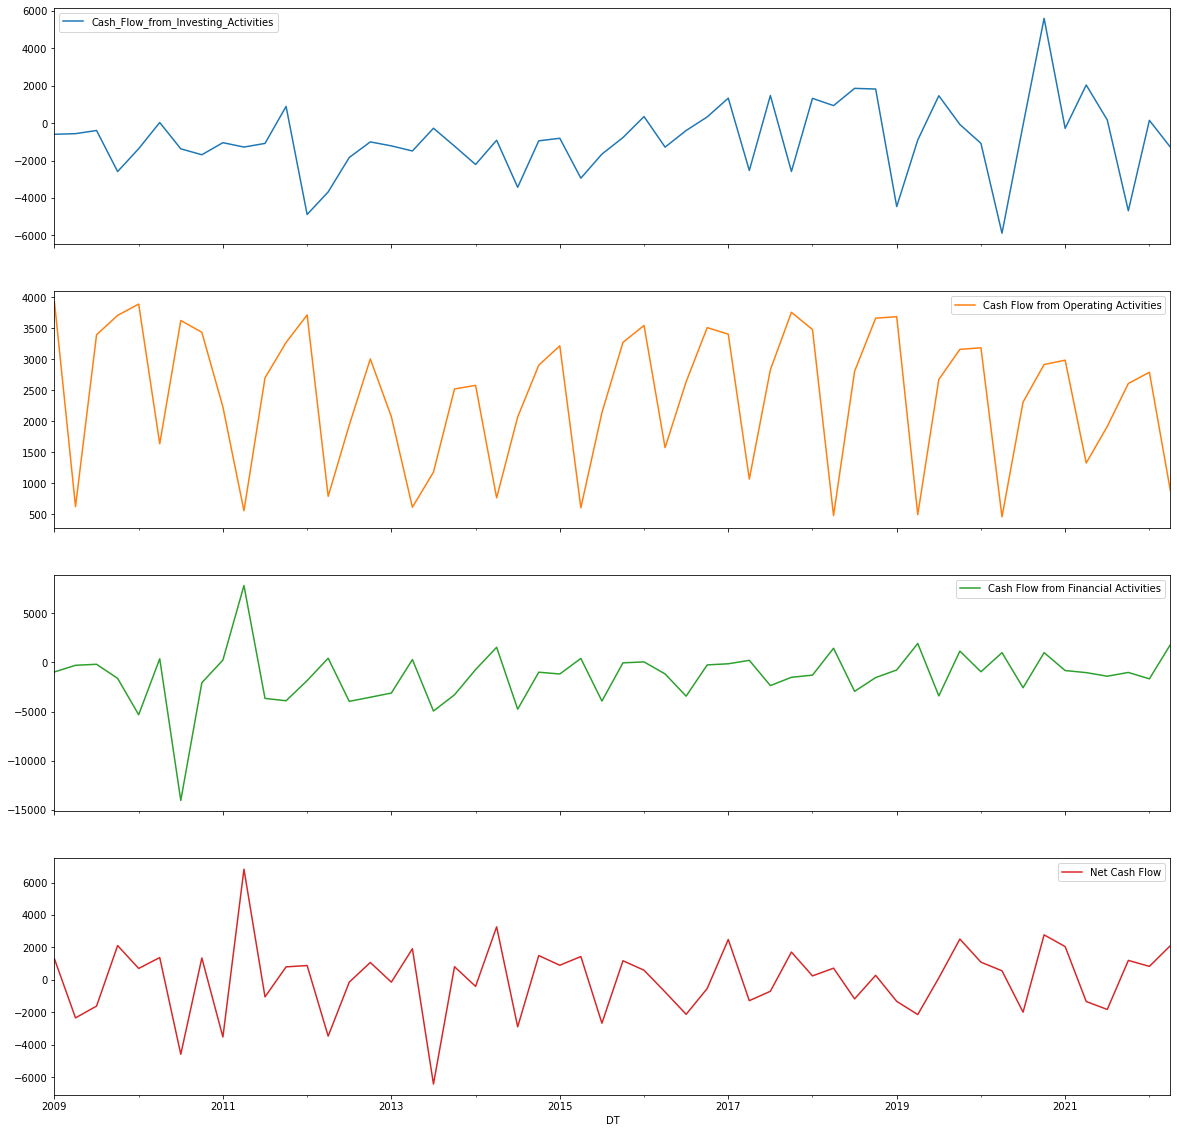

In [8]:
#Vizualizing every column of the dataset 
df.plot(subplots=True,figsize=(20,20))

In [9]:
#checking for null values
df.isnull().sum()

Cash_Flow_from_Investing_Activities    0
Cash Flow from Operating Activities    0
Cash Flow from Financial Activities    0
Net Cash Flow                          0
dtype: int64

In [10]:
import pmdarima as pm

In [67]:
#Applying autoarima to the dataset
model=pm.auto_arima(df['Cash Flow from Operating Activities'],
                   m=4,seasonal=True,
                   start_p=0,start_q=0,max_order=5,test='adf',error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,Trace=True)

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   54
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 4)   Log Likelihood                -384.188
Date:                           Wed, 12 Oct 2022   AIC                            776.376
Time:                                   15:34:18   BIC                            784.025
Sample:                                        0   HQIC                           779.289
                                            - 54                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3974      0.195      2.042      0.041       0.016       0.779
ar.S.L4       -0.3894      0.110     -3.551      0.000      -0.604      -0.174
ar.S.L8       -0.2378      0.103     -2.311      0.021      -0.440      -0.036
sigma2       2.76e+05   4.58e+04      6.025      0.000    1.86e+05    3.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.81   Prob(JB):                         0.16
Heteroskedasticity (H):               0.36   Skew:                            -0.55
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
#splitting the dataset into train and test data 
train=df[(df.index.get_level_values(0)>='2009-03-31')&(df.index.get_level_values(0)<='2021-06-30')]
test=df[(df.index.get_level_values(0)>'2021-06-30')]

In [70]:
train

,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
DT,,,,
2009-03-31,-599,3923,-975,1295
2009-06-30,-565,623,-297,-2344
2009-09-30,-396,3394,-195,-1617
2009-12-31,-2589,3706,-1629,2113
2010-03-31,-1368,3889,-5326,704
2010-06-30,30,1636,364,1374
2010-09-30,-1375,3624,-14043,-4590
2010-12-31,-1692,3434,-2072,1348
2011-03-31,-1047,2230,235,-3524


In [71]:
test

,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
DT,,,,
2021-09-30,166,1916,-1409,-1825
2021-12-31,-4684,2608,-1026,1199
2022-03-31,146,2789,-1675,831
2022-06-30,-1291,873,1817,2115


In [72]:
model.fit(train['Cash Flow from Operating Activities'])

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 4),
      suppress_warnings=True, with_intercept=False)

In [73]:
#forecasting the results for 4 periods 
forecast=model.predict(n_periods=4,return_conf_int=True)

In [74]:
forecast

(array([2885.9381723 , 3334.34389784, 3290.65245662,  986.09470867]),
 array([[1855.89787993, 3915.97846468],
        [2208.15093358, 4460.5368621 ],
        [2146.61371043, 4434.6912028 ],
        [-161.39888155, 2133.5882989 ]]))

In [75]:
#storing the results of arrary in a dataframe 
forecast_df=pd.DataFrame(forecast[0],index=test.index,columns=["Prediction"])

In [76]:
forecast_df

,Prediction
DT,
2021-09-30,2885.938172
2021-12-31,3334.343898
2022-03-31,3290.652457
2022-06-30,986.094709


<AxesSubplot:xlabel='DT'>

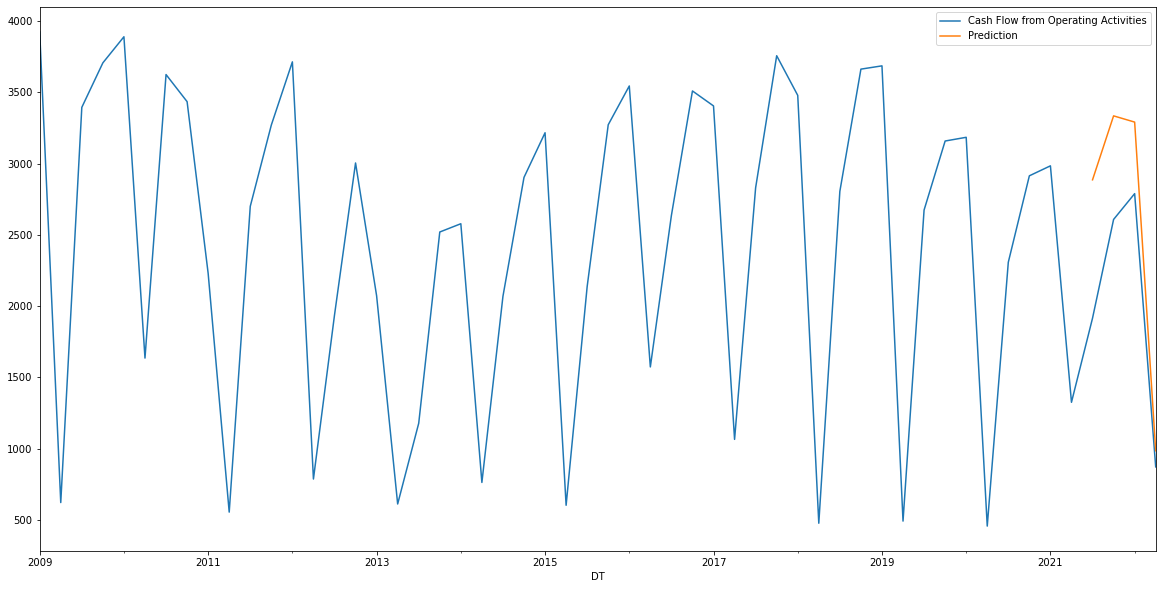

In [77]:
#Vizulizing the forecasted results 
pd.concat([df['Cash Flow from Operating Activities'],forecast_df],axis=1).plot(figsize=(20,10))

In [78]:
#forecasting the results for 8 periods 
forecast1=model.predict(n_periods=8,return_conf_int=True)

In [79]:
forecast1

(array([2885.9381723 , 3334.34389784, 3290.65245662,  986.09470867,
        2751.10421876, 3225.75072935, 3215.93433038,  886.95232022]),
 array([[1855.89787993, 3915.97846468],
        [2208.15093358, 4460.5368621 ],
        [2146.61371043, 4434.6912028 ],
        [-161.39888155, 2133.5882989 ],
        [1449.09671142, 4053.1117261 ],
        [1895.64432768, 4555.85713101],
        [1880.40614778, 4551.46251299],
        [-449.63276844, 2223.53740888]]))

In [80]:
forecast_range=pd.date_range(start='2021-09-30',periods=8,freq='Q')

In [81]:
forecast1_df=pd.DataFrame(forecast1[0],index=forecast_range,columns=["Prediction"])

<AxesSubplot:>

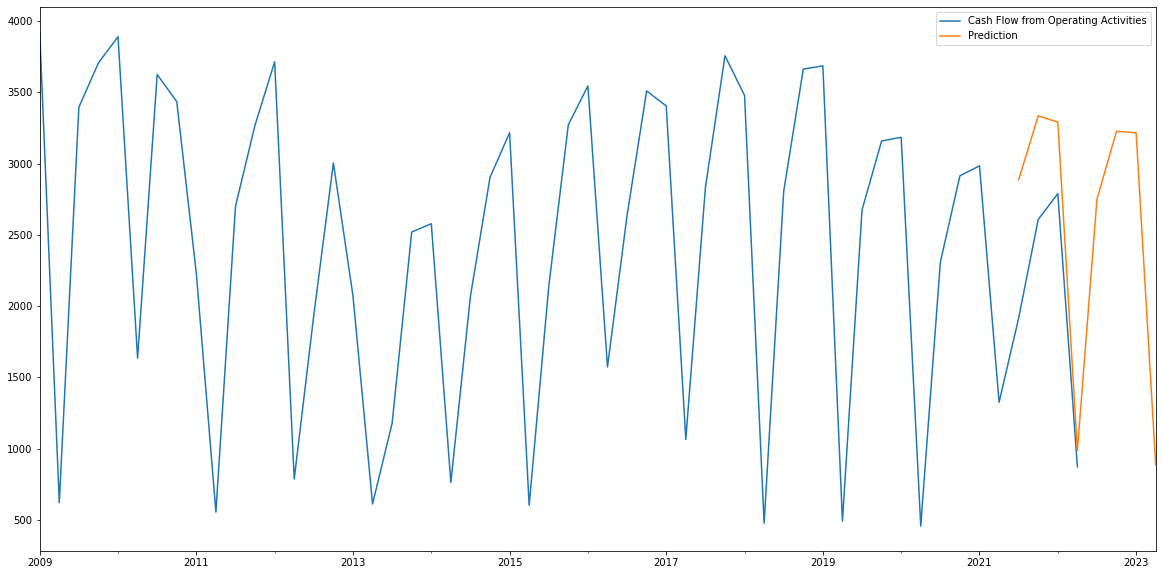

In [89]:
#Vizulizing the final forecasted results in line chart
pd.concat([df['Cash Flow from Operating Activities'],forecast1_df],axis=1).plot(figsize=(20,10))

<AxesSubplot:>

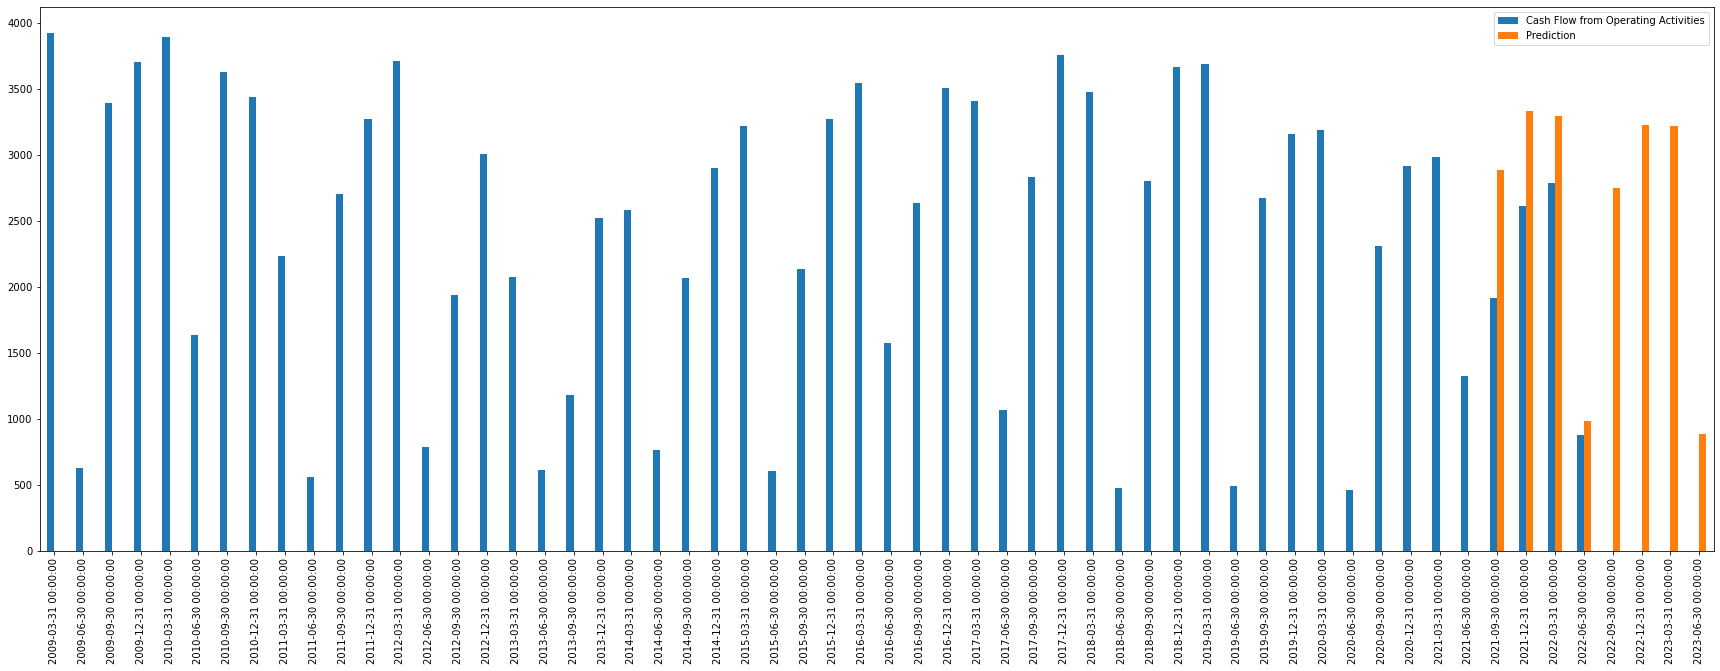

In [87]:
#Vizulizing the final forecasted results in bar chart
pd.concat([df['Cash Flow from Operating Activities'],forecast1_df],axis=1).plot.bar(figsize=(30,10))

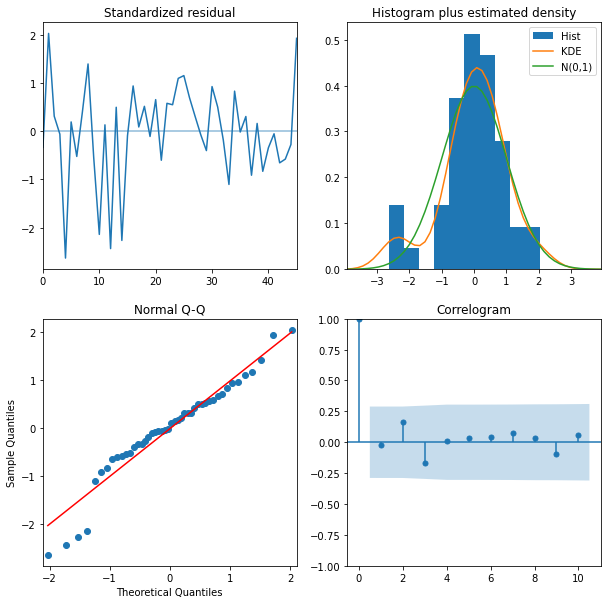

In [84]:
out=model.plot_diagnostics(figsize=(10,10))